<a id='Top'></a>

# Yelp Recommender System Project
## Part 2 Exploratory Data Analysis

### Overview

1. <a href='#Businesses'>Businesses</a>
1. <a href='#Reviews'>Reviews</a>
1. <a href='#Users'>Users</a> 

_The datasets were cleaned and filtered in the data wrangling part of this project (see Data wrangling notebook for details). Note that the datasets here contain __food and restaurant__ related businesses, users, and reviews._

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from ast import literal_eval
from collections import defaultdict

In [2]:
# Load data
businesses = pd.read_csv('food_restaurant_business.csv', index_col=0)
reviews = pd.read_csv('food_restaurant_review.csv', index_col=0)
users = pd.read_csv('food_restaurant_user.csv', index_col=0)

C:\Users\math4\AppData\Local\conda\conda\envs\Springboard\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Now I will explore each of the datasets.

<a id='Businesses'></a>

### 1. Businesses

In [3]:
businesses.head(3)

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,Calgary,AB,51.091813,-114.031675,4.0,24,1,"['Tours', 'Breweries', 'Pizza', 'Restaurants',...",1,1,1.0,2.0,1.0
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,Henderson,NV,35.960734,-114.939821,4.5,3,0,"['Chicken Wings', 'Burgers', 'Caterers', 'Stre...",1,1,1.0,2.0,1.0
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,MontrÃ©al,QC,45.540503,-73.599300,4.0,5,0,"['Breakfast & Brunch', 'Restaurants', 'French'...",1,0,0.0,2.0,0.0


In [4]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72624 entries, 0 to 188590
Data columns (total 15 columns):
business_id                   72624 non-null object
name                          72624 non-null object
city                          72624 non-null object
state                         72624 non-null object
latitude                      72624 non-null float64
longitude                     72624 non-null float64
stars                         72624 non-null float64
review_count                  72624 non-null int64
is_open                       72624 non-null int64
categories                    72624 non-null object
restaurant                    72624 non-null int64
food                          72624 non-null int64
BusinessAcceptsCreditCards    72624 non-null float64
RestaurantsPriceRange2        72624 non-null float64
RestaurantsTakeOut            72624 non-null float64
dtypes: float64(6), int64(4), object(5)
memory usage: 8.9+ MB


- 72624 food and restaurant businesses
- 15 features 

I will explore each of important features.

#### City

In [5]:
businesses.city.nunique()

818

In [6]:
print(sorted(businesses.city.unique()))

['AGINCOURT', 'Agincourt', 'Ahwatukee', 'Airdrie', 'Ajax', 'Allison Park', 'Ambridge', 'Amherst', 'Ange-Gardien', 'Angus', 'Anjou', 'Anthem', 'Argos', 'Arnold', 'Ashburn', 'Aspinwall', 'Auburn', 'Auburn Township', 'Auburn Twp', 'Aurora', 'Avalon', 'Avon', 'Avon Lake', 'Avondale', "Baie-D'urfe", "Baie-d'UrfÃ©", 'Bainbridge', 'Bainbridge Township', 'Baldwin', 'Balzac', 'Banksville', 'Bath', 'Bay Village', 'Beachwood', 'Beaconsfield', 'Beauharnois', 'Bedford', 'Bedford Heights', 'Bedford Hts.', 'Beeton', 'Bell', 'Bellagio', 'Belleville', 'Bellevue', 'Bellvue', 'Belmont', 'Beloeil', 'Ben Avon', 'Berea', 'Bethel Park', 'Black Earth', 'Blainville', 'Blakeney', 'Blawnox', 'Bloomfield', 'Blue Diamond', 'Bois-Des-Filion', 'Bois-des-Filion', 'Boisbriand', 'Bolton', 'Bond Head', 'Boucherville', 'Boulder City', 'Braddock', 'Bradford', 'Bradford West Gwillimbury', 'Brampton', 'Bratenahl', 'Brecksville', 'Brentwood', 'Brettin', 'Bridgeville', 'Bright', 'Broadview Heights', 'Brook Park', 'Brooklin', 

- These 818 cities are not cleaned. 
  - For example, there are many representations for Las Vegas; they are 'Las  Vegas', 'Las Vegas', 'Las vegas', 'LasVegas', 'las vegas'. 
  - Also Toronto is represented as  'Downtown Toronto', 'North Toronto', 'Tornto', 'Toronto', and 'toronto'. 
  - If I am going to use city names for my recommender system, I will clean relevant city names. Since I noticed that Toronto and Las Vegas have many other names in the dataset, I will fix the city names only for these two cities for now.
- I also need to check if there are any same name cities in different states or countries.

_Fixing Toronto and Las Vegas_

In [7]:
businesses[businesses.city=='Tornto']

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut
92869,I9dtHZMPnhgatLqni6EJrA,Wahlburgers,Tornto,ON,43.678335,-79.611824,2.5,138,1,"['American (Traditional)', 'Burgers', 'America...",1,0,1.0,2.0,1.0


This is actually in Toronto (not Tornto).

In [8]:
businesses[businesses.city=='Henderson and Las vegas']

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut
187102,NiYCc7bhbQXftDQPON1aaQ,Just Rollin',Henderson and Las vegas,NV,36.039525,-114.981721,4.0,7,1,"['Food', 'Street Vendors']",0,1,1.0,1.0,1.0


The latitude and longtitude show this business is in Henderson, NV.

In [9]:
businesses['city']=businesses.city.replace({'Henderson and Las vegas':'Henderson'})

In [10]:
def unify_city_names(df, col_name, possible_names, correct_name):
    '''
    This function correct all possible city names to a correct name
    '''
    correct_dict = dict(zip(possible_names,[correct_name]*len(possible_names)))
    print(correct_dict)
    df[col_name]=df[col_name].replace(correct_dict)

In [11]:
# Fix city names for Toronto
Toronto_names = ['Downtown Toronto', 'North Toronto', 'Tornto', 'Toronto', 'toronto']
unify_city_names(businesses, 'city', Toronto_names, 'Toronto')

{'Downtown Toronto': 'Toronto', 'North Toronto': 'Toronto', 'Tornto': 'Toronto', 'Toronto': 'Toronto', 'toronto': 'Toronto'}


In [12]:
# Fix city names for Las Vegas
Las_Vegas_names=['Las  Vegas', 'Las Vegas', 'Las vegas', 'LasVegas', 'las vegas']
unify_city_names(businesses, 'city', Las_Vegas_names, 'Las Vegas')

{'Las  Vegas': 'Las Vegas', 'Las Vegas': 'Las Vegas', 'Las vegas': 'Las Vegas', 'LasVegas': 'Las Vegas', 'las vegas': 'Las Vegas'}


Now the city names are fixed.

In [13]:
businesses.city.nunique()

809

_Make a column for both city and state_

In [14]:
businesses['city_state'] = businesses[['city','state']].apply(lambda x: ', '.join(x), axis=1)
businesses['city_state'][:5]

0      Calgary, AB
1    Henderson, NV
2    MontrÃ©al, QC
5      Phoenix, AZ
6      Toronto, ON
Name: city_state, dtype: object

In [15]:
businesses.city_state.nunique()

840

There are indeed cities with same names!! I will find out those cities.

In [16]:
city_state = pd.Series(businesses.city_state.unique())
unique_city_count = city_state.apply(lambda x: x.split(",")[0]).value_counts()
unique_city_count[unique_city_count>1]

Whitby           3
Laval            3
Montreal         3
Verona           3
Concord          3
Pickering        2
Monroeville      2
Hudson           2
Aurora           2
Richmond Hill    2
Parma            2
Downtown         2
Calgary          2
Indian Land      2
Willoughby       2
Westmount        2
Chandler         2
North Olmsted    2
North York       2
Fort Mill        2
Airdrie          2
Davidson         2
Bedford          2
Scarborough      2
Clark            2
Phoenix          2
Henderson        2
Brooklyn         2
Madison          2
Trafford         2
Vanier           2
dtype: int64

In [17]:
# States with city name 'Montreal'
businesses[businesses.city == 'Concord']['state'].unique()

array(['NC', 'ON', 'OH'], dtype=object)

For example, the cities named 'Concord' are in 3 states, 'NC', 'ON', and 'OH'.

__Top ten cities__

In [18]:
# Top ten cities
top_ten_cities = businesses.city_state.value_counts()[:10]
top_ten_cities

Toronto, ON        9681
Las Vegas, NV      7980
Phoenix, AZ        4962
MontrÃ©al, QC      4251
Calgary, AB        3564
Charlotte, NC      3354
Pittsburgh, PA     3009
Scottsdale, AZ     1954
Cleveland, OH      1774
Mississauga, ON    1678
Name: city_state, dtype: int64

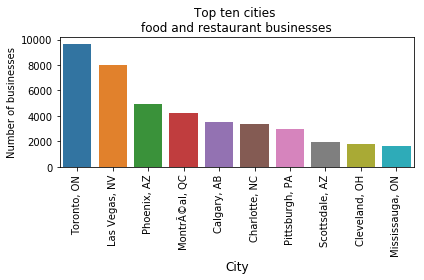

In [19]:
ax = sns.barplot(top_ten_cities.index, top_ten_cities.values)
plt.title("Top ten cities \nfood and restaurant businesses")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of businesses')
plt.xlabel('City', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("top_ten_cities.png",format="png", dpi=300)
plt.show()

The top city is Toronto, ON and the second top is Las Vegas, NV. The top ten cities are all in Canada or United States.

#### Longitude and Latitude

In [20]:
from mpl_toolkits.basemap import Basemap

In [21]:
# code from https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

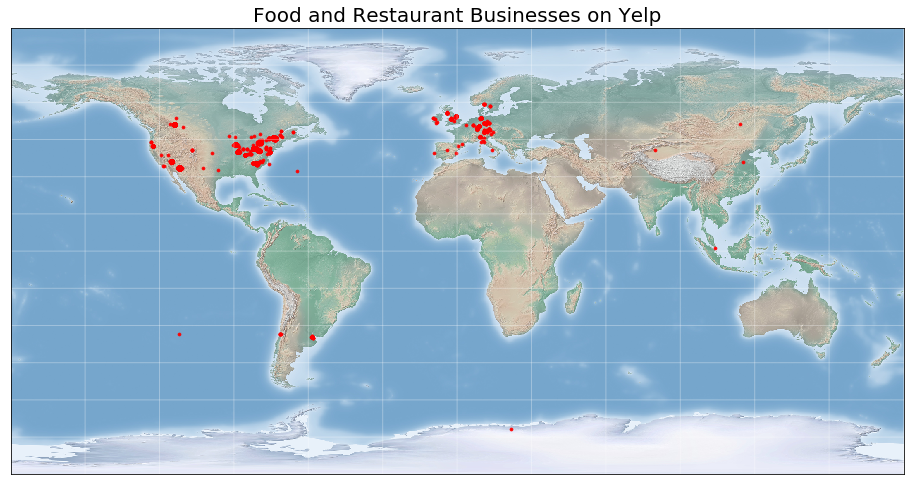

In [22]:
# Basemap
fig = plt.figure(figsize=(16, 12), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

# Add businesses
mxy = m(list(businesses.longitude), list(businesses.latitude))
m.scatter(mxy[0], mxy[1], s=3, c="red", alpha=.9, lw=2)
plt.title("Food and Restaurant Businesses on Yelp", size=20)
plt.savefig("business_map_world.png",format="png", dpi=300)
plt.show()

The world map shows most of food and restaurant businesses on this dataset are in North America and Europe. There are a few businesses in South America and Asia. Some dots on the ocean might represent businesses in some islands. There is even one in Antarctica???

In [23]:
businesses[businesses.latitude == businesses.latitude.min()]

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut,city_state
71134,9LVNrBTJzaBhqqMJs3btHg,Fresh Catch,Turks and Caicos Islands,FL,-71.753941,21.756962,4.0,17,1,"['Food Trucks', 'Caribbean', 'Restaurants', 'A...",1,1,1.0,2.0,1.0,"Turks and Caicos Islands, FL"


This business is actually in Turks and Caicos Islands, not in Antarctica. I found swapping its latitude and longitude makes the correct location for Turks and Caicos Islands.

In [24]:
businesses.at[71134,'latitude'] = 21.756962
businesses.at[71134,'longitude'] = -71.753941

In [25]:
businesses[businesses.index == 71134]

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut,city_state
71134,9LVNrBTJzaBhqqMJs3btHg,Fresh Catch,Turks and Caicos Islands,FL,21.756962,-71.753941,4.0,17,1,"['Food Trucks', 'Caribbean', 'Restaurants', 'A...",1,1,1.0,2.0,1.0,"Turks and Caicos Islands, FL"


#### Stars

In [26]:
star_counts = businesses.stars.value_counts().sort_index()
star_counts

1.0      526
1.5     1516
2.0     3947
2.5     7153
3.0    12460
3.5    16750
4.0    17470
4.5     9732
5.0     3070
Name: stars, dtype: int64

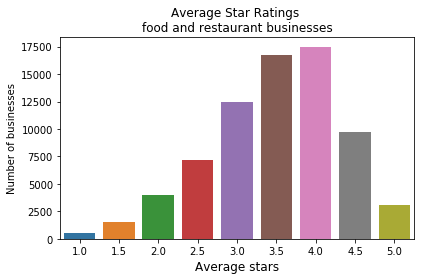

In [27]:
ax = sns.barplot(star_counts.index, star_counts.values)
plt.title("Average Star Ratings \nfood and restaurant businesses")
plt.ylabel('Number of businesses')
plt.xlabel('Average stars', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_business.png",format="png", dpi=300)
plt.show()

The distribution of average stars are slightly left-skewed and peaked at 4 stars. 

#### Review count

In [28]:
businesses.review_count.describe()

count    72624.000000
mean        55.323571
std        146.925646
min          3.000000
25%          6.000000
50%         16.000000
75%         49.000000
max       7968.000000
Name: review_count, dtype: float64

The above shows the distribution of review counts.

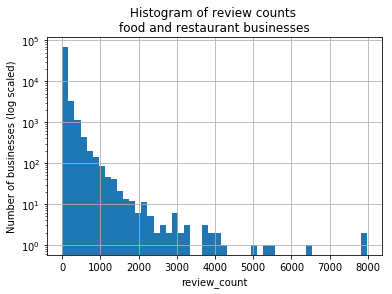

In [70]:
businesses.review_count.hist(bins=50)
plt.yscale('log')
plt.title('Histogram of review counts \nfood and restaurant businesses')
plt.ylabel('Number of businesses (log scaled)')
plt.xlabel('review_count')
plt.show()

The distribution of review counts is highly right-skewed. The histogram shows there are 6 businesses with extreme numbers of reviews over 4500. I will check what they are.

In [31]:
top_review_count_businesses = businesses[businesses.review_count > 4500].sort_values(by='review_count', ascending=False)
top_review_count_businesses

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut,city_state
137635,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,Las Vegas,NV,36.112827,-115.172581,4.0,7968,1,"['Steakhouses', 'Breakfast & Brunch', 'Restaur...",1,0,1.0,2.0,0.0,"Las Vegas, NV"
185167,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,Las Vegas,NV,36.116113,-115.176222,4.0,7866,1,"['Sandwiches', 'Buffets', 'Breakfast & Brunch'...",1,1,1.0,3.0,0.0,"Las Vegas, NV"
62723,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,Las Vegas,NV,36.109550,-115.176155,3.5,6446,1,"['Buffets', 'Restaurants', 'Breakfast & Brunch']",1,0,1.0,3.0,0.0,"Las Vegas, NV"
188309,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,Las Vegas,NV,36.110724,-115.172169,4.0,5472,0,"['Burgers', 'American (Traditional)', 'Restaur...",1,0,1.0,2.0,1.0,"Las Vegas, NV"
170129,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,Las Vegas,NV,36.118181,-115.171580,4.0,5382,1,"['Breakfast & Brunch', 'American (New)', 'Rest...",1,0,1.0,2.0,1.0,"Las Vegas, NV"
177573,DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,Las Vegas,NV,36.109443,-115.171869,4.5,4981,1,"['Sandwiches', 'Wraps', 'Food', 'Caterers', 'R...",1,1,1.0,1.0,1.0,"Las Vegas, NV"


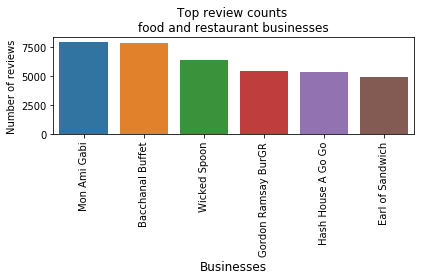

In [34]:
ax = sns.barplot(top_review_count_businesses.name, top_review_count_businesses.review_count)
plt.title("Top review counts \nfood and restaurant businesses")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of reviews')
plt.xlabel('Businesses', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("top_review_counts_businesses.png",format="png", dpi=300)
plt.show()

In [35]:
top_review_count_businesses[['name','restaurant','city_state']]

,name,restaurant,city_state
137635,Mon Ami Gabi,1,"Las Vegas, NV"
185167,Bacchanal Buffet,1,"Las Vegas, NV"
62723,Wicked Spoon,1,"Las Vegas, NV"
188309,Gordon Ramsay BurGR,1,"Las Vegas, NV"
170129,Hash House A Go Go,1,"Las Vegas, NV"
177573,Earl of Sandwich,1,"Las Vegas, NV"


There are all restaurants in Las Vegas, NV!! This makes me wonder which cities have the most reviews.

In [36]:
# Top 10 cities with the most reviews
top_review_count_cities = businesses.groupby(['city_state'])['review_count'].sum().sort_values(ascending=False)[:10]

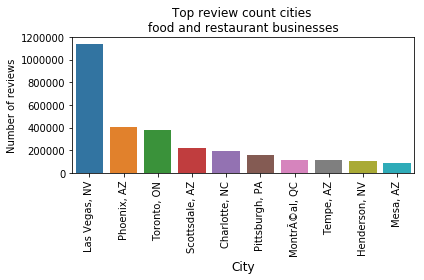

In [37]:
ax = sns.barplot(top_review_count_cities.index, top_review_count_cities.values)
plt.title("Top review count cities \nfood and restaurant businesses")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of reviews')
plt.xlabel('City', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("top_review_count_cities.png",format="png", dpi=300)
plt.show()

- The city with the most number of reviews over 1 million is Las Vegas, NV. The total review count of Las Vegas is almost 3 times higher than that of Phoenix, the city with the second most reviews. Note that the 9th city, Henderson is also part of the Las Vegas metropolita area.
- Toronto is the third although it has the largest number of food and restaurant businesses in this dataset. 

#### Price range

In [38]:
price_range_counts = businesses.RestaurantsPriceRange2.value_counts().sort_index()

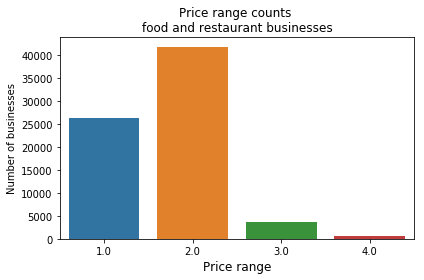

In [39]:
ax = sns.barplot(price_range_counts.index, price_range_counts.values)
plt.title("Price range counts \nfood and restaurant businesses")
plt.ylabel('Number of businesses')
plt.xlabel('Price range', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("price_range_counts.png",format="png", dpi=300)
plt.show()

The most common price range is 2 and then 1 and there are much fewer businesses with price range 3 and 4.

In [40]:
average_review_counts_per_pricerange = businesses.groupby('RestaurantsPriceRange2')['review_count'].mean()

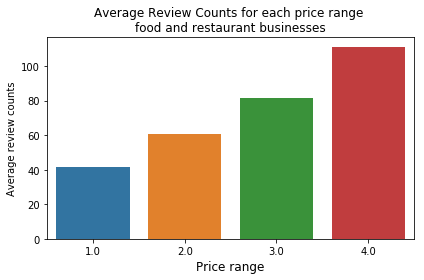

In [41]:
ax = sns.barplot(average_review_counts_per_pricerange.index, average_review_counts_per_pricerange.values)
plt.title("Average Review Counts for each price range \nfood and restaurant businesses")
plt.ylabel('Average review counts')
plt.xlabel('Price range', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("average_review_counts_per_pricerange.png",format="png", dpi=300)
plt.show()

In [42]:
# average stars per price range
businesses.groupby('RestaurantsPriceRange2')['stars'].mean()

RestaurantsPriceRange2
1.0    3.464138
2.0    3.500717
3.0    3.577609
4.0    3.571987
Name: stars, dtype: float64

- The barplot shows people are more likely to leave reviews for more expensive food and restaurant businesses. 
- The average stars tend to be slightly higher for more expensive businesses, but the average differences are very small.

#### Categories

In [43]:
businesses['categories'][0]

"['Tours', 'Breweries', 'Pizza', 'Restaurants', 'Food', 'Hotels & Travel']"

I need to chanck these strings back to lists.

In [44]:
businesses['categories'] = businesses['categories'].apply(lambda x: literal_eval(x))

In [45]:
businesses['categories'][0]

['Tours', 'Breweries', 'Pizza', 'Restaurants', 'Food', 'Hotels & Travel']

In [46]:
businesses['categories'].apply(lambda x: len(x)).mean()

3.898669861202908

There are around 4 categories listed for each business on average.

In [47]:
# count categories in the categories column
categories_dic =defaultdict(int)

for categories in businesses['categories']:
    if categories: #if not empty list
        for category in categories:
            categories_dic[category] +=1

len(categories_dic)

809

There are 809 possible categories.

In [48]:
most_common_categories = pd.DataFrame(sorted(categories_dic.items(), key=lambda x: x[1], reverse=True))[:10]
most_common_categories.columns = ['category','count']
most_common_categories

,category,count
0,Restaurants,57173
1,Food,27118
2,Nightlife,8394
3,Bars,8030
4,Coffee & Tea,6936
5,Sandwiches,6912
6,Fast Food,6812
7,American (Traditional),6659
8,Pizza,6603
9,Burgers,5126


The above shows the top most common categories used in the categories column. Note that they are not exclusive categories. 

In [49]:
#ax = sns.barplot(most_common_categories.category, most_common_categories.count)
#plt.title("Most Common Categories \nfood and restaurant businesses")
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.ylabel('Number of businesses')
#plt.xlabel('Category', fontsize=12)
#plt.tight_layout() # need for savefig
#plt.savefig("most_common_categories.png",format="png", dpi=300)
#plt.show()

<a id='Reviews'></a>

### 2. Reviews

In [50]:
reviews.head(3)

,useful,date,user_id,review_id,cool,funny,business_id,stars
0,0,2011-02-25,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,0,0,iCQpiavjjPzJ5_3gPD5Ebg,2
1,0,2012-11-13,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,0,0,pomGBqfbxcqPv14c3XH-ZQ,5
2,3,2014-10-23,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,1,1,jtQARsP6P-LbkyjbO1qNGg,1


In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017884 entries, 0 to 5996994
Data columns (total 8 columns):
useful         int64
date           object
user_id        object
review_id      object
cool           int64
funny          int64
business_id    object
stars          int64
dtypes: int64(4), object(4)
memory usage: 275.9+ MB


In [52]:
reviews.describe()

,useful,cool,funny,stars
count,4.017884e+06,4.017884e+06,4.017884e+06,4.017884e+06
mean,1.145554e+00,5.913155e-01,4.709713e-01,3.724650e+00
std,3.470553e+00,2.354701e+00,2.494265e+00,1.365443e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
max,1.234000e+03,5.050000e+02,9.910000e+02,5.000000e+00


In [61]:
reviews.columns

Index(['useful', 'date', 'user_id', 'review_id', 'cool', 'funny',
       'business_id', 'stars'],
      dtype='object')

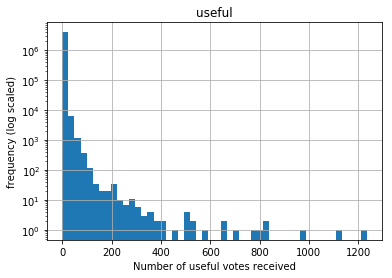

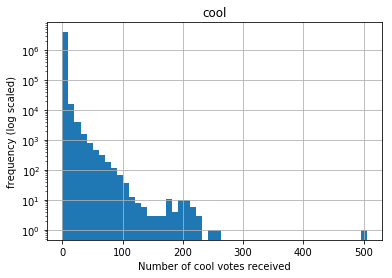

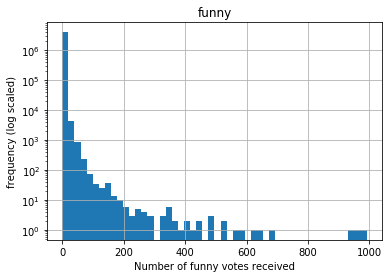

In [68]:
for col in ['useful','cool', 'funny']:
    reviews[col].hist(bins=50)
    plt.yscale('log')
    plt.title(col)
    plt.ylabel('frequency (log scaled)')
    plt.xlabel('Number of '+col+' votes received')
    plt.show()

In [57]:
star_counts = reviews.stars.value_counts().sort_index()
star_counts

1     465334
2     373050
3     539861
4    1063999
5    1575640
Name: stars, dtype: int64

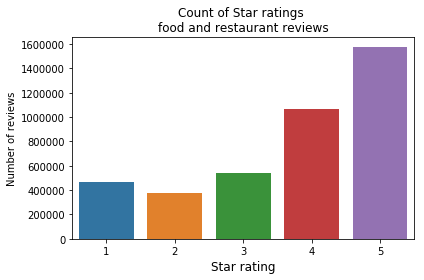

In [60]:
ax = sns.barplot(star_counts.index, star_counts.values)
plt.title("Count of Star ratings \nfood and restaurant reviews")
plt.ylabel('Number of reviews')
plt.xlabel('Star rating', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_reviews.png",format="png", dpi=300)
plt.show()

The graph shows that higher ratings are more frequent except for 1 star (1 star is a little more frequent than 2 stars)!! This is probably because highly rated restaurants tend to have more customers and get more reviews.

<a id='Users'></a>

### 3. Users

In [53]:
users.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21


In [54]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073581 entries, 0 to 1518165
Data columns (total 22 columns):
average_stars         1073581 non-null float64
compliment_cool       1073581 non-null int64
compliment_cute       1073581 non-null int64
compliment_funny      1073581 non-null int64
compliment_hot        1073581 non-null int64
compliment_list       1073581 non-null int64
compliment_more       1073581 non-null int64
compliment_note       1073581 non-null int64
compliment_photos     1073581 non-null int64
compliment_plain      1073581 non-null int64
compliment_profile    1073581 non-null int64
compliment_writer     1073581 non-null int64
cool                  1073581 non-null int64
elite                 1073581 non-null object
fans                  1073581 non-null int64
friends               1073581 non-null object
funny                 1073581 non-null int64
name                  1073184 non-null object
review_count          1073581 non-null int64
useful                10735

In [82]:
users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [69]:
#users.describe()

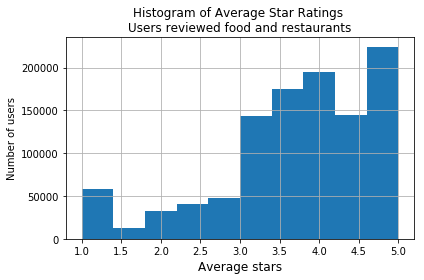

In [78]:
users.average_stars.hist(bins=10)
plt.title("Histogram of Average Star Ratings \nUsers reviewed food and restaurants")
plt.ylabel('Number of users')
plt.xlabel('Average stars', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_users.png",format="png", dpi=300)
plt.show()

The histogram shows that higher star rating users tend to be more frequent; higher stars are received by more users. This result is consistent to the barplot above for the count of reviews for each star rating (more reviews for higher star ratings) probably by the same reason.

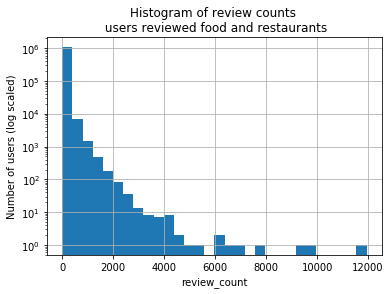

In [84]:
users.review_count.hist(bins=30)
plt.yscale('log')
plt.title('Histogram of review counts \n users reviewed food and restaurants')
plt.ylabel('Number of users (log scaled)')
plt.xlabel('review_count')
plt.show()

The distribution of review counts for users is highly right-skewed. There are about 8 people who left even more than 6000 reviews. Who are they? Where were they?

In [83]:
users[users.review_count > 6000][['average_stars','name', 'review_count', 'yelping_since']]

,average_stars,name,review_count,yelping_since
612296,3.84,Shila,11942,2010-10-17
912339,3.82,Fox,6321,2009-05-26
1065202,3.80,Kim,9811,2006-05-31
1117323,3.49,George,7755,2009-11-06
1125436,3.60,Bruce,9278,2009-03-08
1143354,3.32,Kenneth,6719,2011-06-10
1366811,3.70,Nijole,6863,2011-11-29
1399461,3.31,Jennifer,6082,2009-11-09


They have normal average star ratings (between 3 and 4) and have been using Yelp for many years. The top user 'Shila' left almost 12000 food and restaurant reviews. I will now check the businesses Shila left reviews for.

### References:

https://matplotlib.org/basemap/users/installing.html
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

Basemap installation in Windows:

I followed the instruction here
https://stackoverflow.com/questions/18109859/how-to-install-matplotlib-basemap-module-on-windows-7-with-winpython-or-any-pyt

1. Activate environment (skip if environment is not used)
2. cd to the folder where python is located (https://pythontips.com/2013/07/30/python-install-location-and-version/ tips for checking python version and location)
3. pip install pyproj-1.9.6-cp36-cp36m-win_amd64.whl 
(.whl file was downloaded from https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyproj and moved to the python folder)
4. pip install basemap-1.2.0-cp36-cp36m-win_amd64.whl
(.whl file was downloaded from https://www.lfd.uci.edu/~gohlke/pythonlibs/ and moved to the python folder) 

<a href='#Top'>Return to Top</a>